In [199]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [135]:
df = pd.read_csv("steps_tracker_dataset.csv")

In [136]:
df.head(2)

,date,steps,distance_km,calories_burned,active_minutes,sleep_hours,water_intake_liters,mood
0,08/10/2022,4147,3.11,124.41,41,10.5,3.77,stressed
1,11/06/2022,323,0.24,9.69,3,6.0,1.90,sad


In [137]:
print(f"Data Information:")
df.info()

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 500 non-null    object 
 1   steps                500 non-null    int64  
 2   distance_km          500 non-null    float64
 3   calories_burned      500 non-null    float64
 4   active_minutes       500 non-null    int64  
 5   sleep_hours          500 non-null    float64
 6   water_intake_liters  500 non-null    float64
 7   mood                 500 non-null    object 
dtypes: float64(4), int64(2), object(2)
memory usage: 31.4+ KB


In [138]:
print(f"Data Description: \n{df.describe()}")

Data Description: 
              steps  distance_km  calories_burned  active_minutes  \
count    500.000000   500.000000       500.000000       500.00000   
mean   10238.572000     7.678800       307.157160       102.40800   
std     5829.268207     4.371964       174.878046        58.29293   
min       26.000000     0.020000         0.780000         0.00000   
25%     5313.250000     3.985000       159.397500        53.00000   
50%    10699.000000     8.025000       320.970000       107.00000   
75%    15317.500000    11.490000       459.525000       153.00000   
max    19979.000000    14.980000       599.370000       200.00000   

       sleep_hours  water_intake_liters  
count   500.000000           500.000000  
mean      7.292400             2.506580  
std       1.814046             1.426296  
min       3.100000             0.040000  
25%       6.000000             1.300000  
50%       7.000000             2.495000  
75%       8.225000             3.785000  
max      12.000000     

In [139]:
print(f"Shape of Data: {df.shape}")

Shape of Data: (500, 8)


# The Data has 500 rows and 8 Columns

In [140]:
# Checking for null values

df.isnull().sum()

date                   0
steps                  0
distance_km            0
calories_burned        0
active_minutes         0
sleep_hours            0
water_intake_liters    0
mood                   0
dtype: int64

# There is no Null Values in the dataset

In [141]:
# Checking for duplicates
print(f"Duplicates: {df.duplicated().sum()}")

Duplicates: 0


# There is no Duplicates value in the data

In [142]:
# Encode the mood values

le = LabelEncoder()
df["mood_encoded"] = le.fit_transform(df['mood'])

In [143]:
# Checking the mood and mood encoded value

mood_group = df.groupby("mood")["mood_encoded"].unique()
mood_group

mood
energetic    [0]
happy        [1]
sad          [2]
stressed     [3]
tired        [4]
Name: mood_encoded, dtype: object

There are 5 moods which are alligned as

Energetic -> 0
Happy -> 1
Sad -> 2
Stressed -> 3
Tired -> 4

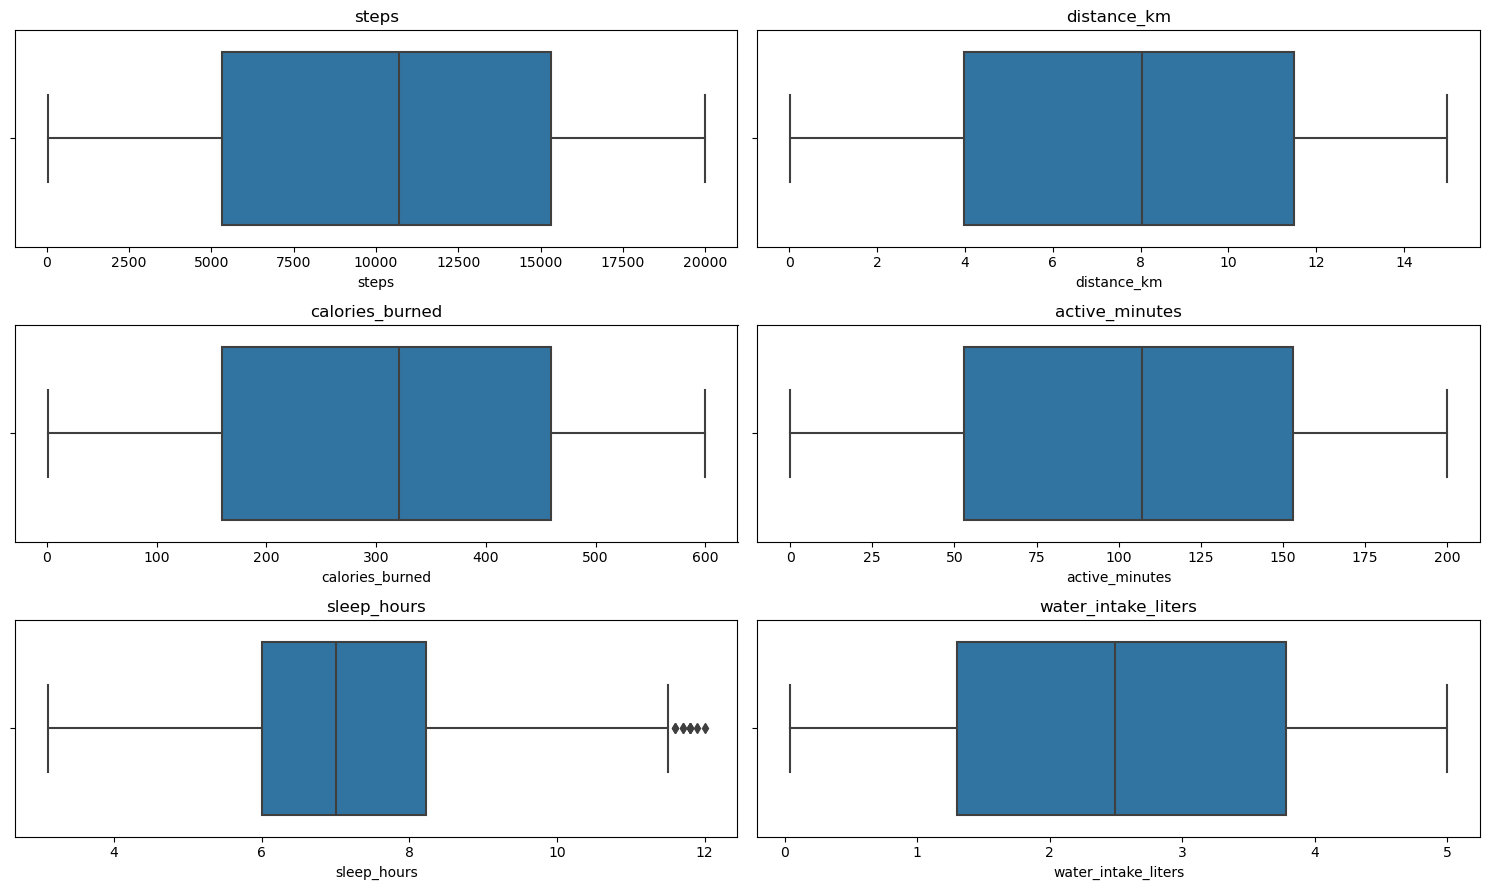

In [144]:
# Checking for Outliers
numeric_col = df.select_dtypes(include=["int64", "float64"]).columns
plt.figure(figsize=(15,9))
for i, col in enumerate(numeric_col, 1):
    plt.subplot(3,2,i)
    sns.boxplot(x = df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Only Sleep hours has Outliers

In [145]:
# Detecting Outliers

q1 = df["sleep_hours"].quantile(0.25)
q3 = df["sleep_hours"].quantile(0.75)
iqr = q3-q1

lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

outlier = df[(df["sleep_hours"] < lower_bound) | (df["sleep_hours"] > upper_bound)]["sleep_hours"].values
print(f"Outliers: {outlier}")

Outliers: [11.6 12.  11.6 11.8 11.8 11.9 11.8 11.8 11.7 11.7]


In [172]:
# Removing Outliers

new_data = df[(df["sleep_hours"] > lower_bound) & (df["sleep_hours"] < upper_bound)]
print(f"Shape of New Data: {new_data.shape}")

Shape of New Data: (490, 9)


# The New Data has 490 Rows and 9 Columns

In [171]:
new_data.head(2)

,date,steps,distance_km,calories_burned,active_minutes,sleep_hours,water_intake_liters,mood,mood_encoded
0,2022-10-08,4147,3.11,124.41,41,10.5,3.77,stressed,3
1,2022-06-11,323,0.24,9.69,3,6.0,1.90,sad,2


In [182]:
mood_count = new_data["mood"].value_counts()

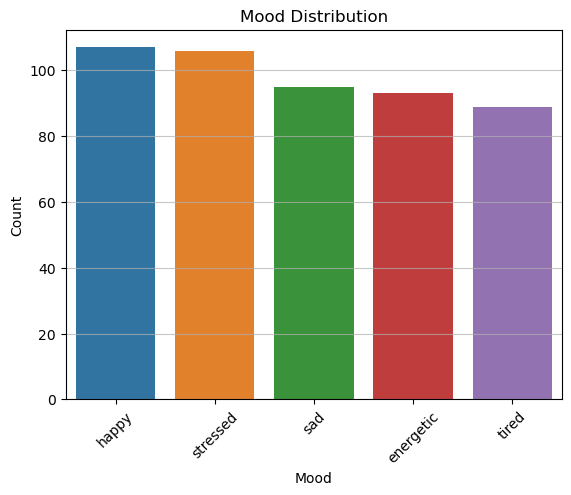

In [198]:
sns.barplot(x = mood_count.index, y = mood_count.values)
plt.grid(axis="y", linestyle="-", alpha=0.7)
plt.xlabel("Mood")
plt.ylabel("Count")
plt.title("Mood Distribution")
plt.xticks(rotation=45)
plt.show()

# Majority of people are in Happy Mood

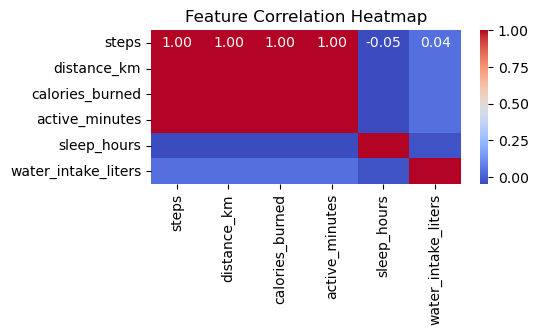

In [170]:
# Correlation Matrix
corr_matrix = new_data.drop(columns=["date", "mood", "mood_encoded"]).corr()

# Plot heatmap
plt.figure(figsize=(5,2))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Steps, distance_km, calories_burned and active_minutes are highly correlated to each other.

In [154]:
# Training and Testing of data

x = new_data.drop(columns=["date", "mood_encoded", "mood"])
y = new_data["mood_encoded"]

# Standardize numerical features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 42)

In [155]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel="linear", random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Display model performance
results

{'Logistic Regression': 0.20408163265306123,
 'Random Forest': 0.1326530612244898,
 'SVM': 0.19387755102040816,
 'Gradient Boosting': 0.20408163265306123}

# Logistic Regression is the best model for this data.